In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Ẩn thông báo warning về các thay đổi trong phiên seaborn mới. 
# Ẩn đi không ảnh hưởng gì
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Lineplot
+ Khá tương đồng với Scatterplot ngoài trừ việc <u>*biến trục x là có thứ tự*</u>, các điểm dữ liệu sẽ được nối lại với nhau theo đúng thứ tự của biến x tạo thành các đường nối giữa các điểm rời rạc. (thường x là các biến liên quan đến thời gian)
+ Các tham số quan trong của lineplot() giống chức năng của scatterplot()

## Simple Lineplot

In [64]:
dowjones = sns.load_dataset("dowjones")
dowjones

,Date,Price
0,1914-12-01,55.00
1,1915-01-01,56.55
2,1915-02-01,56.00
3,1915-03-01,58.30
4,1915-04-01,66.45
...,...,...
644,1968-08-01,883.72
645,1968-09-01,922.80
646,1968-10-01,955.47
647,1968-11-01,964.12


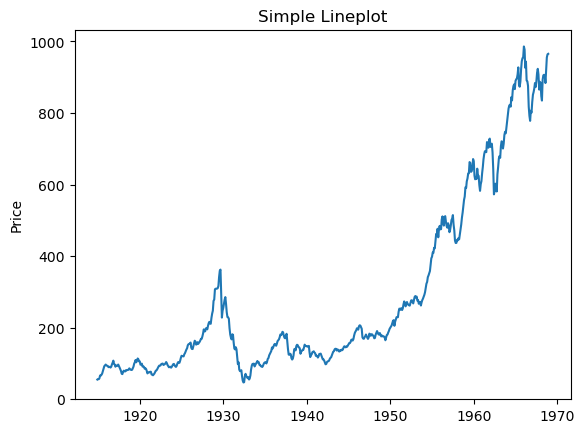

In [65]:
dowjones.replace(np.inf, np.nan)    # thay the gia tri inf bang Nan. Nhưng không hiểu sao vẫn hiện warning.

fig,ax = plt.subplots()

sns.lineplot(data=dowjones, x="Date", y="Price", ax=ax)

ax.set_title('Simple Lineplot')
ax.set_xlabel('')
plt.show()

## Với tập dữ liệu mà 1 biến x có nhiều giá trị y
+ Do 2 biến mặc định: <u>*estimator='mean'; errorbar=('ci', 95)*</u> lên mặc định sẽ vẽ confident-interval 95%
+ lineplot() sẽ <u>*vẽ giá trị trung bình của biến x*</u> và các giá trị của x sẽ được dùng để tính <u>*confident interval 95%*</u>
+ confident interval này được tính theo <u>*bootstrap-sampling*</u>                  
+ sử dụng biến <u>*errorbar*</u> để ẩn hiện Interval Confident   
VD: biến x ở dưới là trục thời gian, biểu diễn sự biến thiên của biến y. Ở cùng 1 thời điểm biến y nhận nhiều giá trị. như ở thời điểm x=18, y có rất nhiều giá trị. Biểu đồ bên dưới là biểu diễn sự biến thiên của biến y và confiden interval của biến y.      
==> xem thêm ỏ ErrorBar

In [6]:
fmri = sns.load_dataset('fmri')
fmri.isna().sum().sum()            # kiem tra xem co gia tri nan ko
fmri.isin([np.inf]).sum().sum()    # kiem tra xem co gia tri inf ko
fmri

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970
...,...,...,...,...,...
1059,s0,8,cue,frontal,0.018165
1060,s13,7,cue,frontal,-0.029130
1061,s12,7,cue,frontal,-0.004939
1062,s11,7,cue,frontal,-0.025367


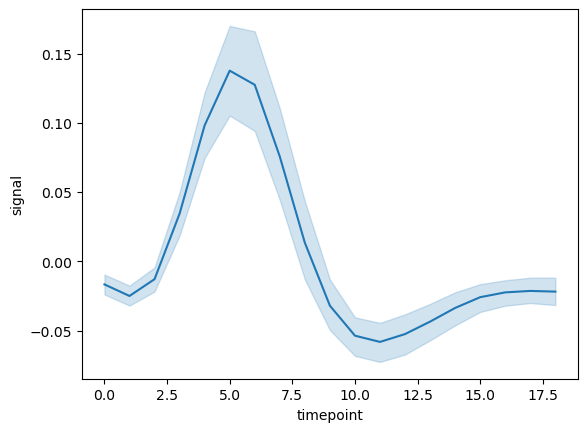

In [67]:
sns.lineplot(data=fmri, x="timepoint", y="signal")
plt.show()

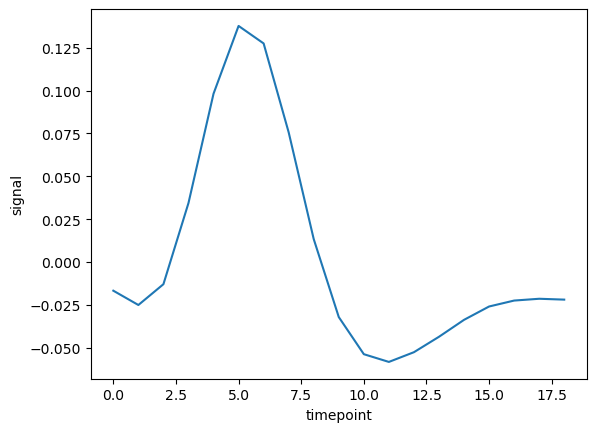

In [68]:
# errorbar= None để ẩn interval-confident
sns.lineplot(data=fmri, x='timepoint', y='signal', errorbar=None)   # errorbar
plt.show()

## Mặc định hàm lineplot() sẽ sắp xếp các giá trị của x theo thứ tự tăng dần trước khi vẽ 
sort = **False** để bỏ điều này. Thì <u>*lineplot() sẽ vẽ theo đúng thứ tự của x xuất hiện trong dataframe*</u>

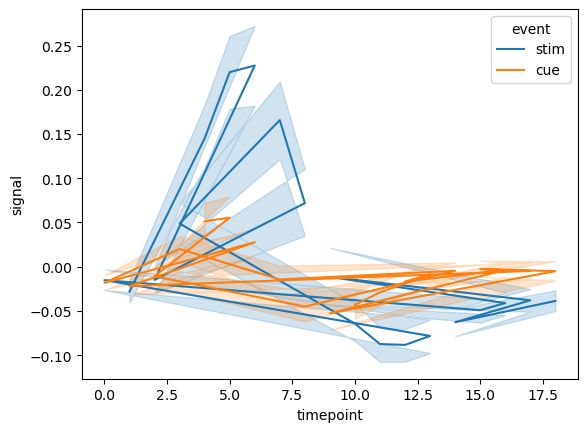

In [70]:
sns.lineplot(data=fmri, x='timepoint', y='signal', hue='event', sort=False)   # sort 
plt.show()

## Hue, Style, Size - chia nhỏ line thành các line nhỏ hơn tương ứng với giá trị nó nhận
+ **Hue**: chia nhỏ line thành các line nhỏ hơn tương ứng với các gía trị của biến hue và <u>**mỗi line sẽ được tô màu khác nhau**</u>
+ **Style**: chia nhỏ line thành các line nhỏ hơn tương ứng với các giá trị của biến style và <u>**mỗi line sẽ được vẽ bằng các kí hiệu khác nhau**</u>
+ **Size**: chia nhỏ line thành các line nhỏ hơn tương ứng với các giá trị của biến size và <u>**mỗi line sẽ có kích thước to nhỏ tương ứng**</u>  

==> Thường nếu dùng cả hue và style thì cho hue=style cho dễ nhìn

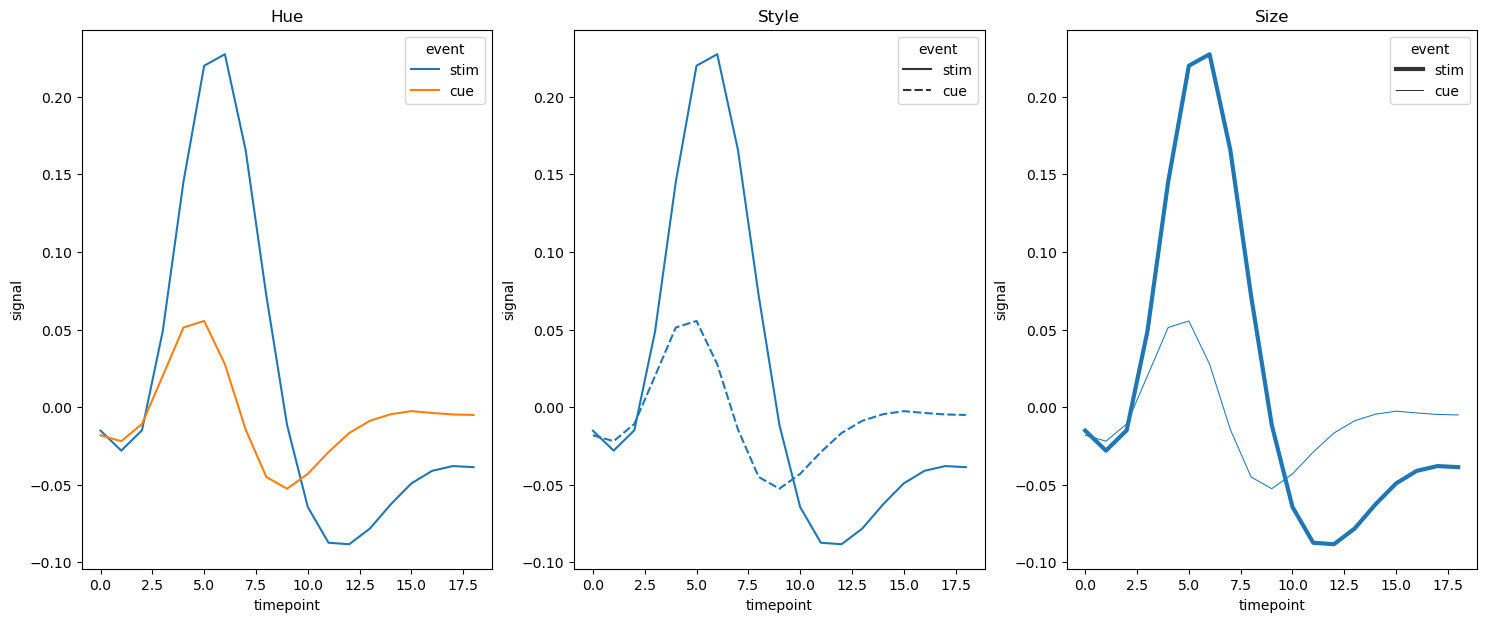

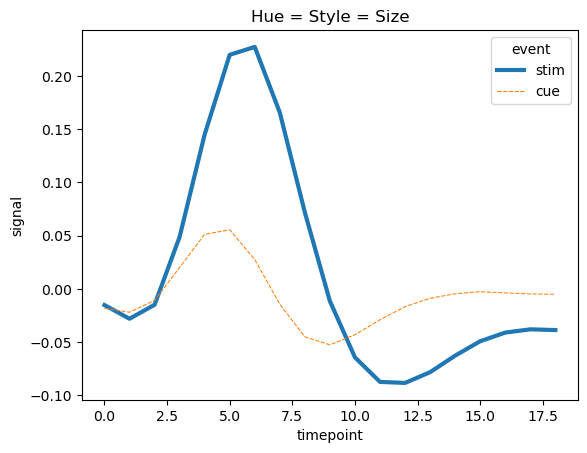

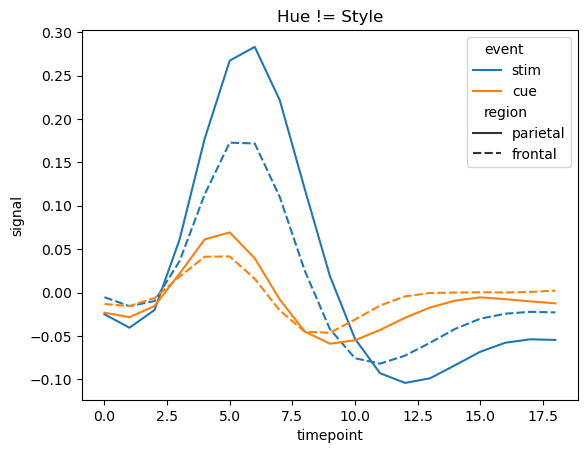

In [27]:
# 1. Xet tung parameter
fig,ax = plt.subplots(1,3, figsize=(18,7))

sns.lineplot(data=fmri, x='timepoint', y='signal', errorbar=None, hue='event', ax=ax[0])    # hue
sns.lineplot(data=fmri, x='timepoint', y='signal', errorbar=None, style='event', ax=ax[1])    # style
sns.lineplot(data=fmri, x='timepoint', y='signal', errorbar=None, size='event', ax=ax[2])    # size

ax[0].set_title('Hue')
ax[1].set_title('Style')
ax[2].set_title('Size')
plt.show()

# 2. hue=style=size
sns.lineplot(data=fmri, x='timepoint', y='signal', errorbar=None, hue='event', style='event', size='event').set_title('Hue = Style = Size')   # hue = style = size
plt.show()

# 3. hue != style
sns.lineplot(data=fmri, x='timepoint', y='signal', errorbar=None, hue='event', style='region').set_title('Hue != Style')   # hue =! style 
plt.show()


## Marker vs Dash
+ ***marker***: kí hiệu để vẽ các điểm dữ liệu. Marker=True sẽ vẽ cho từng điểm dữ liệu 
+ ***dash***: đường thẳng được vẽ bởi các đường gạch nhỏ nối liền nhau (như hình).        
    + Giá trị đầu tiên là độ dài của đường thẳng nhỏ đó
    + Giá trị thứ là khoảng cách giữa 2 đường thẳng nhỏ liên tiếp           

VD: dashes=[(1,0), (6,6)]
+ (1,0): chiều dài đoạn nhỏ là 1, khoảng cách là 0. Có nghĩa vẽ nét liền
+ (6,6): chiều dài đoạn nhỏ là 6, khoảng cách là 6.


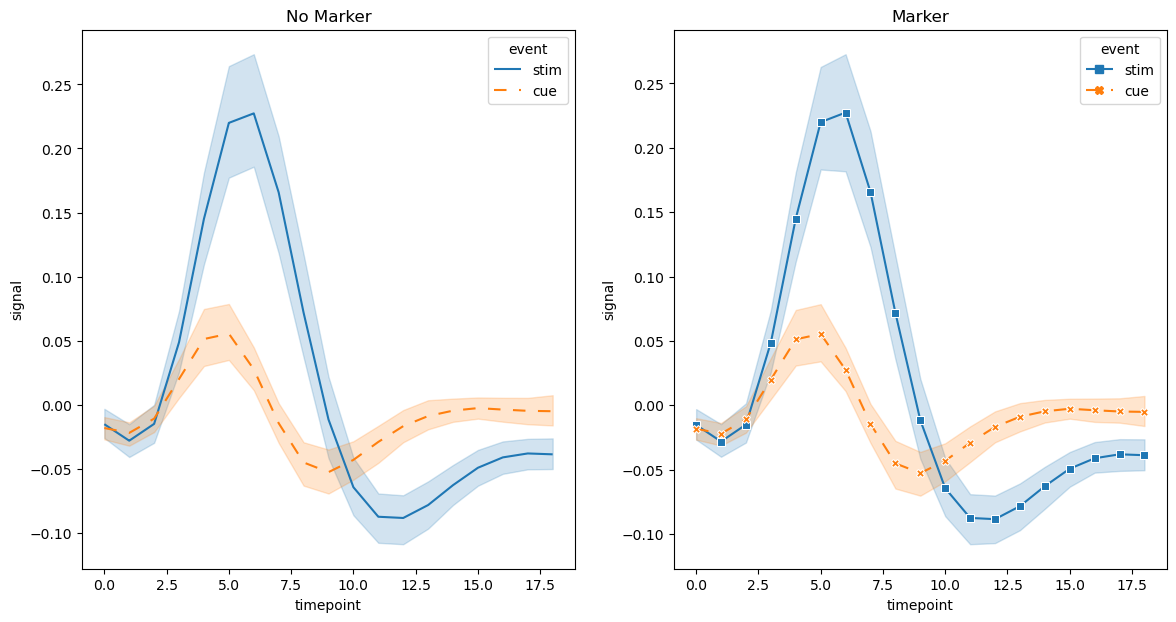

In [15]:
fig,ax = plt.subplots(1,2, figsize=(14,7))

# marker = False
sns.lineplot(
    data=fmri, 
    x="timepoint", y="signal", hue="event", style="event",
    markers=False, dashes=[(1,0), (6,6)],    # makers, dashes
    ax = ax[0]
)

# marker = True
sns.lineplot(
    data=fmri, 
    x="timepoint", y="signal", hue="event", style="event",
    markers={'stim':'s', 'cue':'X'}, dashes=[(1,0), (6,6)],    # makers, dashes
    ax = ax[1]
)

ax[0].set_title('No Marker')
ax[1].set_title('Marker')

plt.show()

## Sort & Orient
2 tham số sort và orient đi chung với nhau:
+ sort: vẽ các điểm dữ liệu lần lượt theo thứ tự tăng dần của trục đuọc chỉ định vẽ ở orient. VD: mặc định orient='x', Tức là datapoint nào có x nhỏ hơn thì sẽ được vẽ trước
+ orient: chỉ định trục nào sẽ được xét thứ tư để vẽ lineplot

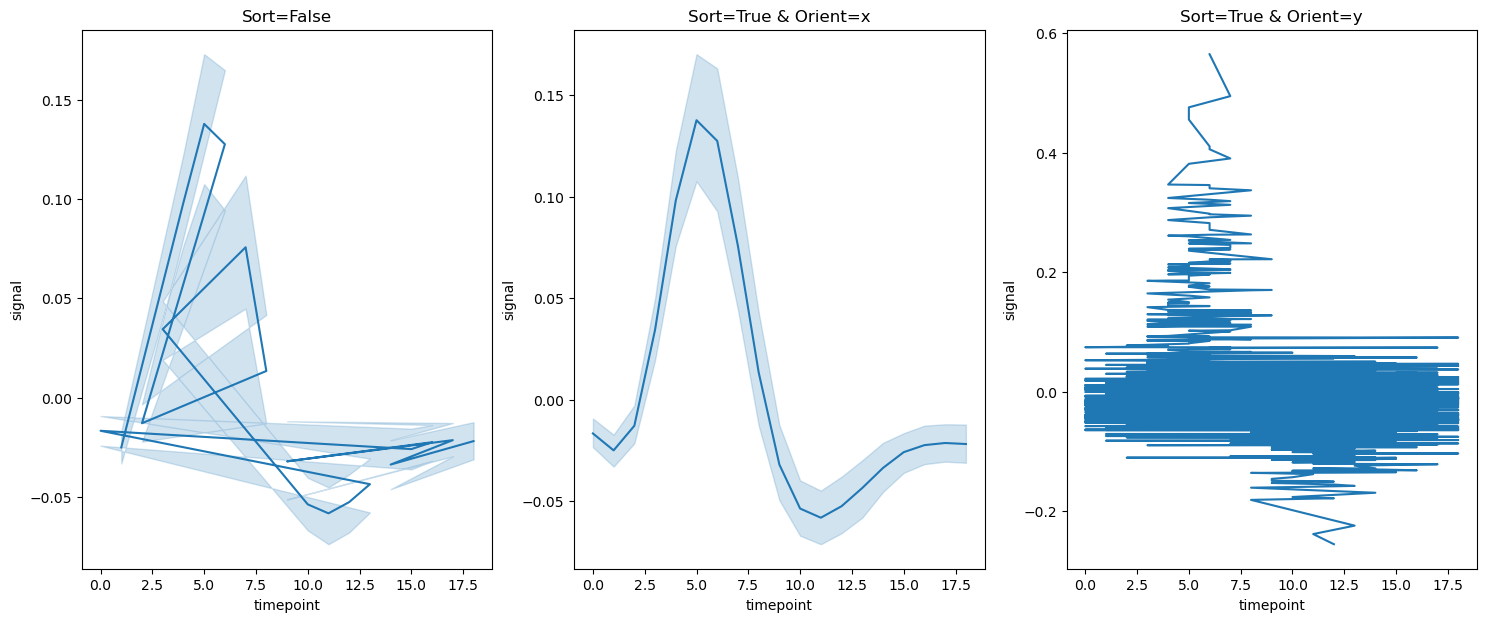

In [36]:
fig,ax = plt.subplots(1,3, figsize=(18,7))

sns.lineplot(data=fmri, x='timepoint', y='signal', sort=False, ax=ax[0])
sns.lineplot(data=fmri, x='timepoint', y='signal', ax=ax[1])
sns.lineplot(data=fmri, x='timepoint', y='signal', orient='y', ax=ax[2])

ax[0].set_title('Sort=False')
ax[1].set_title('Sort=True & Orient=x')
ax[2].set_title('Sort=True & Orient=y')
plt.show()

<Axes: xlabel='timepoint', ylabel='signal'>

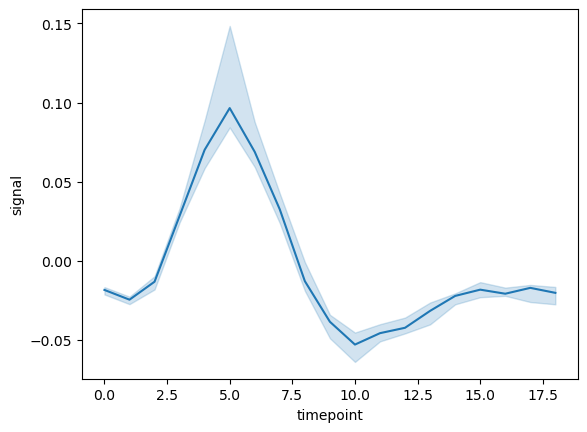

In [77]:
sns.lineplot(data=fmri, x='timepoint', y='signal',
             estimator='median',
             errorbar=('pi', 10))